In [95]:
import torch

def fun(X):
    N,dim=X.size()
    y=torch.zeros(N)
    for i in range(0,N):
        Xi=torch.cos(X[i,:])*torch.cos(X[i,:])
        y[i]=torch.dot(Xi.t()-1,Xi-1)+1
    return y

## Generate a Graph

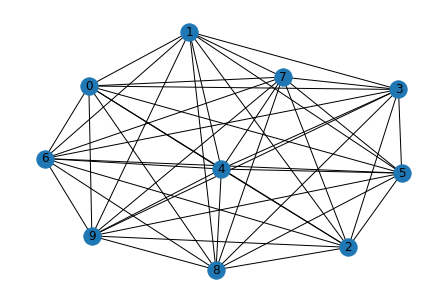

In [96]:
import networkx as nx
from rff import GaussianRff
import numpy as np
import torch
import copy
is_communication=True
num_nodes=10
num_init=5
N_per_node=1000
N=int(N_per_node*num_nodes)
batch=1
# simple node information
dim=1
D=20
gamma=1
# generate a graph
# G=nx.barabasi_albert_graph (num_nodes,num_init)
G=nx.complete_graph (num_nodes)

net=torch.nn.Linear(D,1,bias=False)
kernel=GaussianRff(dim,gamma,net,D)
kernel.net.weight.data=kernel.theta.unsqueeze(0)

for v in range(0,num_nodes):
    kernel_v=copy.deepcopy(kernel)# copy.deepcopy is neccessary to prevent objects from being the only one
    G.nodes[v].update({'index':v,'learner':kernel_v})
    G.nodes[v].update({'send_info':[]})  #kernel.theta#send infomation to other nodes
    G.nodes[v].update({'recev_info':[]})
    G.nodes[v].update({'batch':batch})
    # print(G.nodes[v]['index'])

    # G.nodes[v].update({'para':{'theta':kernel.theta,'grad':kernel.grad}})
pos = nx.spring_layout(G)
nx.draw(G,pos)
node_labels=nx.get_node_attributes(G,'index')
nx.draw_networkx_labels(G,pos,labels=node_labels)
# generete dataset
n_split=np.zeros(num_nodes)+N/num_nodes
for v in range(0,num_nodes):
    x=torch.randn(int(n_split[v]),dim)
    y=fun(x)
    data_split={'x':x,'y':y}
    G.nodes[v].update({'data':data_split})# data -> local nodes 
    # print(G.nodes[i]['data'])
# G.degree(1) number of degree
min_N=int(min(n_split))


######
#######
# grad=torch.zeros(1,kernel.D)
T=min_N/batch
from matplotlib import pyplot as plt
plt.savefig('figs/sk/D_N_{}_Sk_G_it_{}_b_{}_D_{}_com_{}.png'.format(num_nodes,int(T),batch,D,is_communication),dpi=600)


## Create Graph Learning Framework

In [97]:
from decentralize_fk_3_0 import GraphLearning

GL=GraphLearning(G)

In [98]:
import torch.nn.functional as F
# loss=F.mse_loss(yhat, yt)
testN=100
testX=torch.randn(testN,dim)+1
testY=fun(testX)
#########################       MSE         ##################################
T=int(T)
rff_mse_T=torch.zeros(num_nodes,T)#record performance of MK by MSE 
##################################################

In [99]:
GL.GLearning(T)

Glearning start!
node 7: train is over!!!!!!!!!
node 1: train is over!!!!!!!!!
node 8: train is over!!!!!!!!!
node 6: train is over!!!!!!!!!
node 9: train is over!!!!!!!!!

node 2: train is over!!!!!!!!!
node 4: train is over!!!!!!!!!

node 0: train is over!!!!!!!!!



node 3: train is over!!!!!!!!!



node 5: train is over!!!!!!!!!


